
<h1 style="color:Blue;"><center>Introduction to STATA</center> </h1>


The STATA interface:

<img src="img/statainterface2.png">


<ul>
    <li><strong>Command Window</strong> -- Where you type commands 
    <li><strong>Results Viewer</strong> -- Where the results of those commands appear
    <li><strong>Variables Window</strong> -- Where your variables will be listed
    <li><strong>Properties Window</strong> -- Shows the properties of those variables


Can use to STATA as a calculator using the <code><u>di</u>splay</code> (``di`` for short) command

In [1]:
di 2+2 

4


In [2]:
di 2*3

6


Or use ``display`` to print text

In [3]:
di "Hello World"

Hello World



**Workflow** is how you organize your data, code, etc. While very important in research and business, often not discussed and people often learn through making a lot of mistakes.

Good workflow can take time to set up, but will save you a lot of time down the road. 

<img src = "img/baddirectory1.png" width="600">

This is a **bad** project directory
<ul>
    <li> What is the "correct" dataset?
    <li> What is temp vs. misc?
    <li> How can I replicate my writeup later?
<ul>
    
    
    
    
    
    
    
    

<center><img src = "img/gooddirectory2.png" width="600"></center>

This is a **good** project directory:
<ul>
    <li> Clear where everything goes
    <li> Make sure the subfolders do not get messy like the previous example!
<ul>
    
    
     

We will almost never write commands directly into the command window. Instead we will use a "do-file"

<center><img src = "img/dofile1.png" width="800"></center>

<img src = "img/dofile3.png">

At the top of every do-file, you should open up a **log file**. A log file record your session in STATA (everything you type and every result that comes out of the command window)

Helpful with (1) looking at long list of output (2) reproducing your own work (3) sending code and results to others

To open a logfile:

In [4]:
log using tutorial_logfile, text replace

--------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code/tutorial_log
> file.log
  log type:  text
 opened on:  22 Aug 2020, 15:14:43


When I finish my session I can go look at "tutorial_logfile.log" to see what I did.

Before we get to analyzing the data, we first need to load it into STATA. To do so we need to learn about the **working directory**

The working directory is just a file path on your computer that the program will have as the default path to load in data or save files

To check what you have set as your working directory use the ``pwd`` command (short for print working directory)

In [5]:
pwd

/Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code


You should set your working directory at the beginning of all your do-files. To change your working directory, use the ``cd`` command (short for change directory)

In [6]:
cd /Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code

/Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code


Now that we are setup, let's load some data.

Today's application: how do colleges promote intergenerational mobility and how does this vary across colleges?
    <ul>
        <li> Higher education widely viewed as path for upward mobility
        <li> But if elite institutions mainly benefit student from high-income backgrounds, higher education may amplify intergenerational income inequality
    </ul>
        
This question has been nearly impossible to answer due to data constraints. Need (1) to link children to their parents (2) have income information for both children and parents and (3) link children to their college. This is a herculean data task!

Researchers at [Opportunity Insights](https://opportunityinsights.org/) have collected such a dataset by linking children to parents using federal income tax returns and then linking children to institutions using education data

Therefore, we can look in the data and see which colleges admit students from low-income backgrounds and then produce high-income graduates (i.e. what colleges promote intergenerational income mobility)

They do this for **every college** in the U.S.

Also, they make this data available to other researchers (today us!)

The ``use`` command allows us to load data in STATA. We also specify ``, replace`` which tells STATA to replace any data that is currently loaded into STATA with the new dataset we want to use:

In [7]:
use ../data/mrc.dta, replace

(Preferred Estimates of Access and Mobility Rates by College)


Short aside: I took advantage of **relative paths** here to load the data. There is a dataset on my computer in the **absolute path** "/Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/data"

My working directory is in "/Users/davidarnold/Dropbox/Teaching/ECON5/Jupyter/code"

Therefore, I can specify the relative path "../data/" to enter the "data" folder. The "../" tells the computer to look back one folder and then look for a folder named "data". If no folder had existed, I would have gotten an error.

Let's explore the variables in this dataset with the ``describe`` command

In [8]:
describe 


Contains data from ../data/mrc.dta
  obs:         2,202                          Preferred Estimates of Access
                                                and Mobility Rates by College
 vars:             7                          21 Aug 2020 15:11
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
name            str141  %141s                 Name of Institution / Super-OPEID
                                                Cluster
state           str2    %9s                   State of constituent instition
                                                with highest enrollment
par_median      double  %9.0g                 Median parental income
k_median        float   %9.0g                 Median kid income
par_q1          float   %9.0g                 Fraction of parent

<ul>
    <li> Quintile 1 is bottom 20 percent of the income distribution
    <li> Quintile 5 is top 20 percent of the income distribution
</ul>

Let's look at some summary statistics for median parental income (``par_median``) using the ``summarize`` command. 
    

In [9]:
summarize par_median


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  par_median |      2,202    77695.46    28463.28      21200     226700


Imagine we want to know more about the ``summarize`` command. Commands in STATA come with a help file. These are extremely useful. Whenever using a new command, it is a good idea to look up the help file.

STATA makes this easy to do with the ``help`` command.

In [10]:
help summarize


[R] summarize -- Summary statistics
                 (View complete PDF manual entry)


Syntax
------

        summarize [varlist] [if] [in] [weight] [, options]

    options           Description
    --------------------------------------------------------------------------
    Main
      detail          display additional statistics
      meanonly        suppress the display; calculate only the mean;
                        programmer's option
      format          use variable's display format
      separator(#)    draw separator line after every # variables; default is
                        separator(5)
      display_options control spacing, line width, and base and empty cells

    --------------------------------------------------------------------------
    varlist may contain factor variables; see fvvarlist.
    varlist may contain time-series operators; see tsvarlist.
    by, rolling, and statsby are allowed; see prefix.
  
    aweights, fweights, and iweights are allowed. 

Let's use the ``, detail`` option to learn more above median parental income across colleges

In [11]:
summarize par_median, detail


                   Median parental income
-------------------------------------------------------------
      Percentiles      Smallest
 1%        29300          21200
 5%        37800          23900
10%        45100          25100       Obs               2,202
25%        59100          26400       Sum of Wgt.       2,202

50%        74300                      Mean           77695.46
                        Largest       Std. Dev.      28463.28
75%        91700         208900
90%       110300         218100       Variance       8.10e+08
95%       128200         219600       Skewness       1.222058
99%       176900         226700       Kurtosis       5.948575


We will frequently need to **generate** new variables in STATA. In this example, we will generate the mobility rate for each college, defined as:

$$
\begin{equation}
\text{mobility rate} = \text{fraction from bottom quintile} \times \text{fraction from bottom quintile that reach top quintile}
\end{equation}
$$

Intuition: If a college admits a large fraction of low-income students (the first term) and these students become high-earners (the second term), then this school promotes interegenerational income mobility.

"fraction of students from bottom quintile" is given by the variable ``par_q1``

"fraction bottom that reach top quintile" is given by ``kq5_cond_parq1``

In [12]:
gen mobility_rate = par_q1*kq5_cond_parq1

Let's compare mobility rates of colleges in California vs. all other states

To do so we will create a binary variable

In [13]:
gen CA_ind = (state=="CA")

The variable ``CA_ind`` will be and indicator variable equal to 1 if the college is in California and 0 otherwise

Note the double equals sign (``==``). The way to "read" this command is "if state is equal to CA, then set CA_ind=1, if state is not equal to CA, then set CA_ind=0"

Double equals in STATA are used when you are testing equality of two things. Single equals are for setting the value of a variable to something

A useful way to describe binary (or categorical) variables is to use the ``tab`` command, which counts the number of observations in each cell defined by the binary (or categorical) variable (or the combination of multiple binary/categorical variables). For example:

In [14]:
tab CA


     CA_ind |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      2,034       92.37       92.37
          1 |        168        7.63      100.00
------------+-----------------------------------
      Total |      2,202      100.00


168 of the colleges in the dataset are in California. 

Let's see how mobility rates compare across CA and other states

In [15]:
sum mobility_rate par_q1 kq5_cond_parq1 if CA==1
sum mobility_rate par_q1 kq5_cond_parq1 if CA==0



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
mobility_r~e |        168    .0275095    .0154819          0   .0991846
      par_q1 |        168    .1443805    .0889914   .0321324   .4606968
kq5_cond_p~1 |        168    .2481358    .1638556          0   .8497473


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
mobility_r~e |      2,034     .017511    .0126387          0   .1635797
      par_q1 |      2,034    .1234973    .0880145   .0111896   .6097748
kq5_cond_p~1 |      2,034    .1917753    .1360376          0   .9192932


<strong> Interpretation </strong>
<ul>
    <li> Mobility rates are higher in CA (0.027 vs 0.17)
    <li> This is driven by two factors 
        <ul>
            <li> More students from low-income backgrounds (0.14 vs. 0.12)
            <li> Low-income students more likely to become high-income (0.25 vs. 0.19)
         </ul>
</ul>

Now let's look at the data for UCSD in particular!

In [16]:
sum mobility_rate par_q1 kq5_cond_parq1 if name == "University Of California, San Diego"


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
mobility_r~e |          1    .0483275           .   .0483275   .0483275
      par_q1 |          1    .0877724           .   .0877724   .0877724
kq5_cond_p~1 |          1    .5506001           .   .5506001   .5506001


<strong> Interpretation </strong>

<ul>
    <li> Mobility rates are quite a bit higher at UCSD relative to CA 
        <ul>
            <li> Fewer students come from low-income backgrounds (0.09 vs. 0.14)
            <li> But those that do are very likely to become high earners (0.55 vs. 0.25)
        </ul>
    <li> Overall, this latter effect dominates, leading to high mobility rates for UCSD   
</ul>



## Graphing in Stata

What we have done so far has been helpful to learn more about the dataset and STATA commands

But data visualization is **essential** for understanding and communicating data

Let's see what STATA has to offer in terms of graphics

In [17]:
help graph


[G-2] graph -- The graph command
               (View complete PDF manual entry)


Syntax
------

        graph ...

    The commands that draw graphs are

        Command                 Description
        ----------------------------------------------------------------------
        graph twoway            scatterplots, line plots, etc.
        graph matrix            scatterplot matrices
        graph bar               bar charts
        graph dot               dot charts
        graph box               box-and-whisker plots
        graph pie               pie charts
        other                   more commands to draw statistical graphs
        ----------------------------------------------------------------------

    The commands that save a previously drawn graph, redisplay previously
    saved graphs, and combine graphs are

        Command                 Description
        ----------------------------------------------------------------------
        graph save           

``graph twoway`` includes a large number of different plot types and will be our most used graph command.

Today we will discuss **histograms**, which are useful to visualize the distribution of a variable. A histogram cuts the variable into a number of different bins, and then counts the number of observations in each bin.

For example, in our example, we will cut the variable mobility rates into different bins, then count the number of colleges within each bin, and then plot those counts 

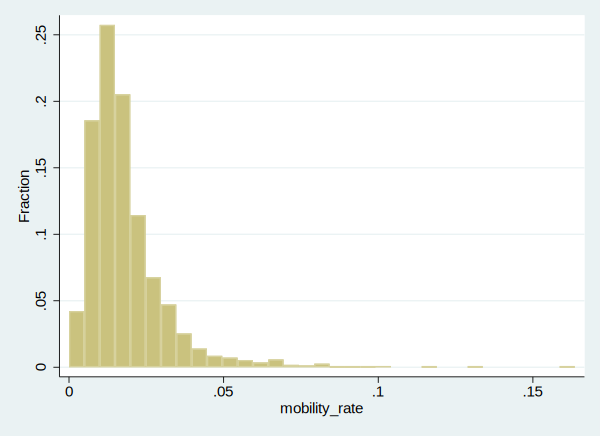

In [18]:
graph twoway histogram mobility_rate, frac

Interestingly, mobility has a "long right tail". While most mobility rates cluster in the 0.02-0.04 range, we have a few colleges with extremely high mobility rates relative to other colleges



We can customize our graph with more options. Type ``help histogram`` to see these. One option is to specify the ``width()`` of each bin. 

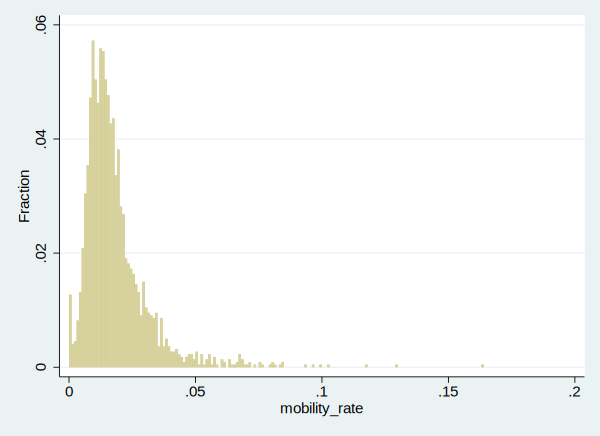

In [19]:
graph twoway histogram mobility_rate, frac width(0.001)


Next, because we are from UCSD, let's add a UCSD to the graph to see how we compare against the entire distribution. UCSD's mobility rate was equal to 0.0483275.

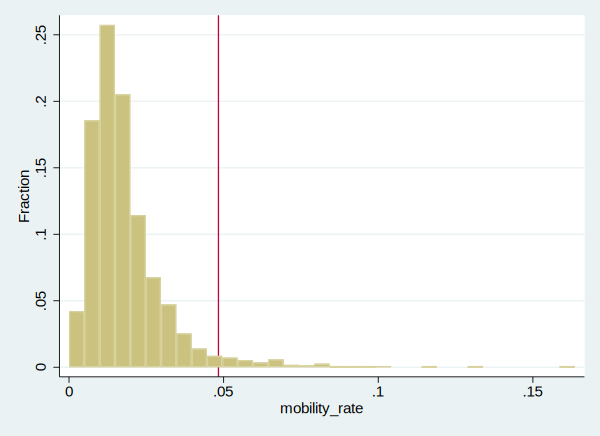

In [20]:
graph twoway histogram mobility_rate, frac xline(0.0483275)

Now add (1) a descriptive title (2) labels and (3) customized aesthetics 

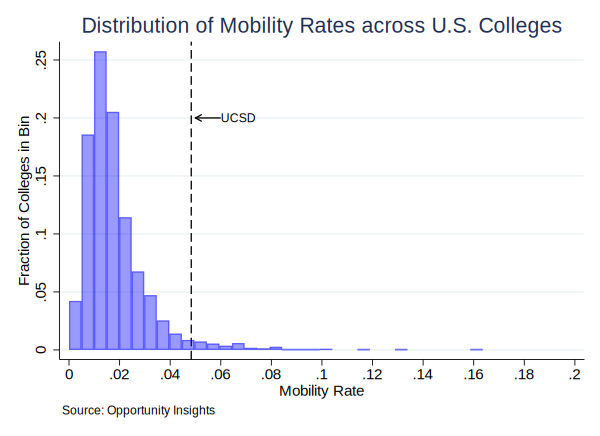

In [21]:
graph twoway histogram mobility_rate, frac color(blue%40) ///
    || pcarrowi 0.2 0.06 0.2 0.05, lc(black) mcolor(black) ///
    text(0.2 0.06 "UCSD"  , place(e) size(small) color(black) ) /// 
    xline(0.0483275, lc(black) lp(dash)) ///
    xlabel(0(0.02)0.2) ///
    title("Distribution of Mobility Rates across U.S. Colleges") ///
    xtitle("Mobility Rate") ///
    ytitle("Fraction of Colleges in Bin") ///
    note("Source: Opportunity Insights") ///
    legend(off) ///
    graphregion(color(white) fcolor(white)) 

Ok so that was a lot of changes. Let's go through it one at a time.
<ul>
<li>Line 1: "color(blue%40)" changed the color of the histogram. The "%40" will make the bars translucent. This isn't really so helpful here, but occasionally you will see pictures with two overlaid histograms. It is easier to see both if you make them translucent.

<li>Line 2: This adds an arrow to the graph that starts at (y1,x1) = (40, 0.06) and ends at the point (y2,x2) = (40, 0.05). The options "lc(black)" make the line part of the arrow black and the option "mcolor(black)" makes the head of the arrow black.

<li>Line 3: This adds the text "UCSD" to the point in the graph (y,x) = (40, 0.06). the option "place(e)" adjusts the location of the text just east of (40,0.06). The "size(small)" option changes the font to a smaller smize, and lastly "color(black)" makes the text of the word black.

<li>Line 4: This defines how the x-axis will appear. "0(0.02).02" tells STATA to make the x-axis go from 0 to 0.2 in increments of 0.02.

<li>Line 5: This gives the graph a descriptive title.

<li>Line 6 & 7: Titles the x and y-axis.

<li>Line 8: Adds a footnote to the graph.

<li>Line 9: Turns the legend off. Sometimes you will want a legend. For example, if there are multiple line plots or multiple histograms, you should give a clear label to each. In this case there is only a single histogram and I've already labelled it in the title.

<li>Line 10: This changes the background of the plot so that it is white instead of the light blue.
<ul>


## Conclusion

Now you should know how to:
<ul>
    <li> Set up a do-file in STATA
    <li> Load data and calculate basic summary statistics
    <li> Generate new variables
    <li> Produce simple graphics
</ul>